In [5]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.io import mmread

In [6]:
G_fb_food = nx.read_edgelist('empirical_networks/fb-pages-food/fb-pages-food.edges', delimiter=',')
G_fb_food.remove_edges_from(nx.selfloop_edges(G_fb_food))
matrix_bio_celegans = mmread('empirical_networks/bio-celegans/bio-celegans.mtx')
G_bio_celegans = nx.from_scipy_sparse_array(matrix_bio_celegans)
G_bio_CE_GT = nx.read_edgelist('empirical_networks/bio-CE-GT/bio-CE-GT.edges', data=False)
matrix_rt_retweet = mmread('empirical_networks/rt-retweet/rt-retweet.mtx')
G_rt_retweet = nx.from_scipy_sparse_array(matrix_rt_retweet)
matrix_USAir = mmread('empirical_networks/inf-USAir97/inf-USAir97.mtx')
G_USAir = nx.from_scipy_sparse_array(matrix_USAir)
G_web_wisconsin = nx.read_edgelist('empirical_networks/webkb_wisconsin_link1.csv/edges.csv', delimiter=',', data=False)
G_web_wisconsin.remove_edges_from(nx.selfloop_edges(G_web_wisconsin))

print(len(G_web_wisconsin.nodes()))

300


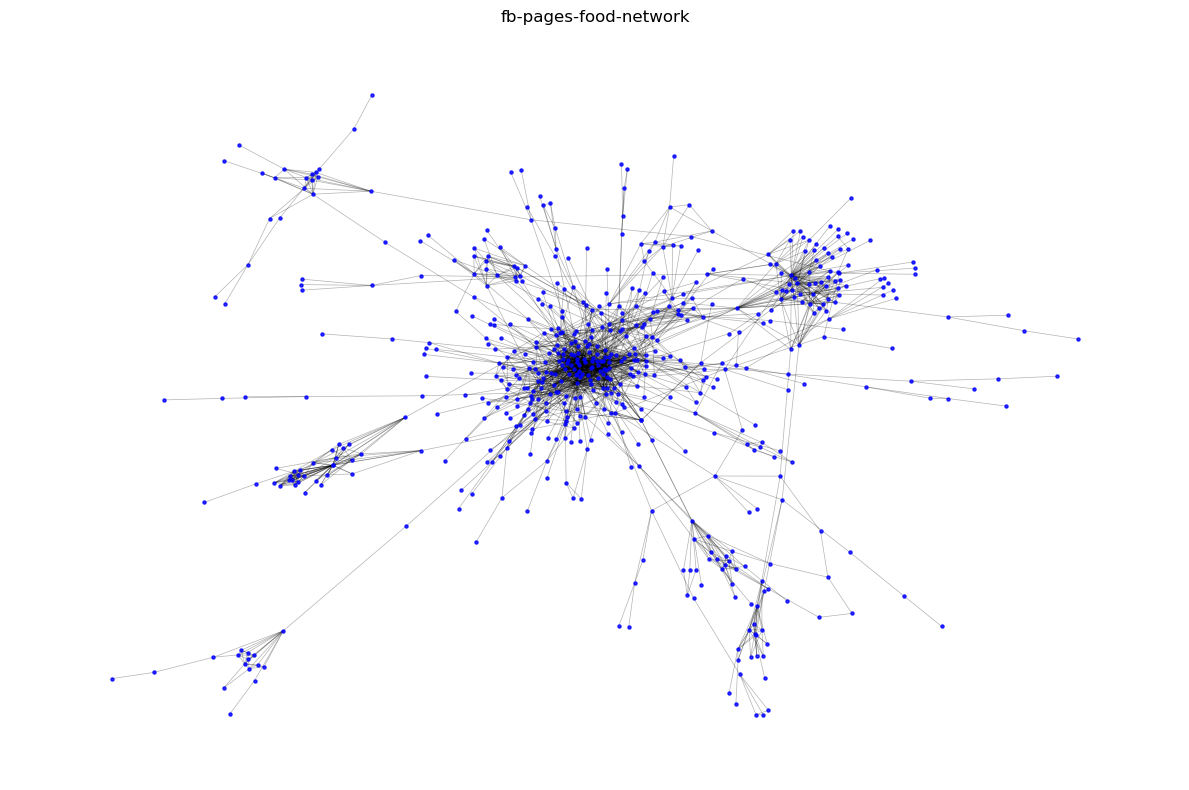

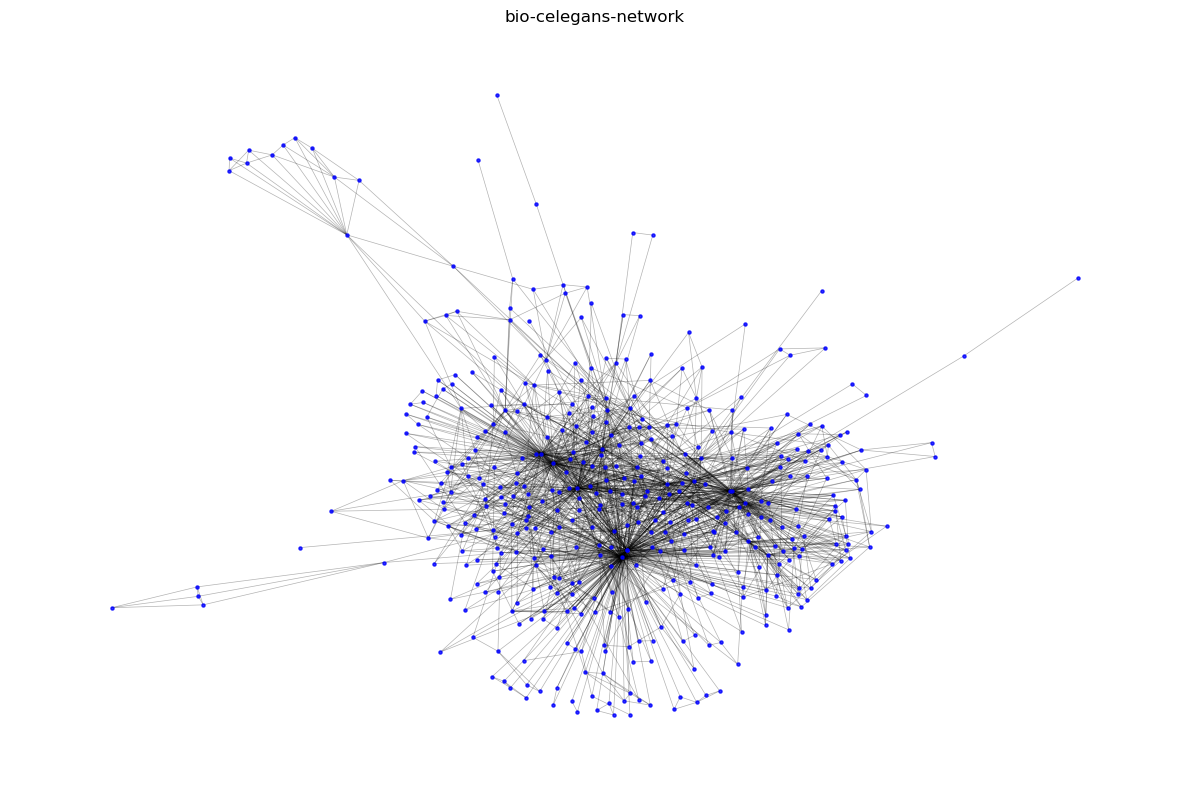

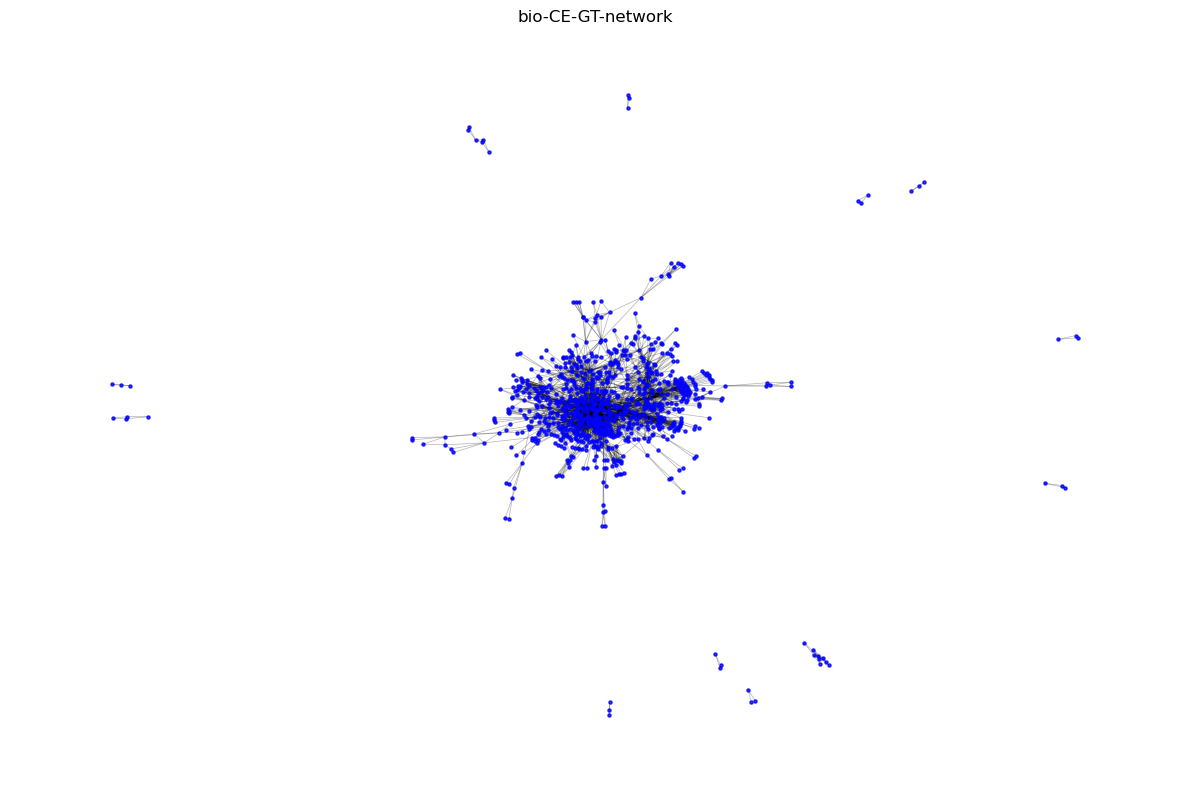

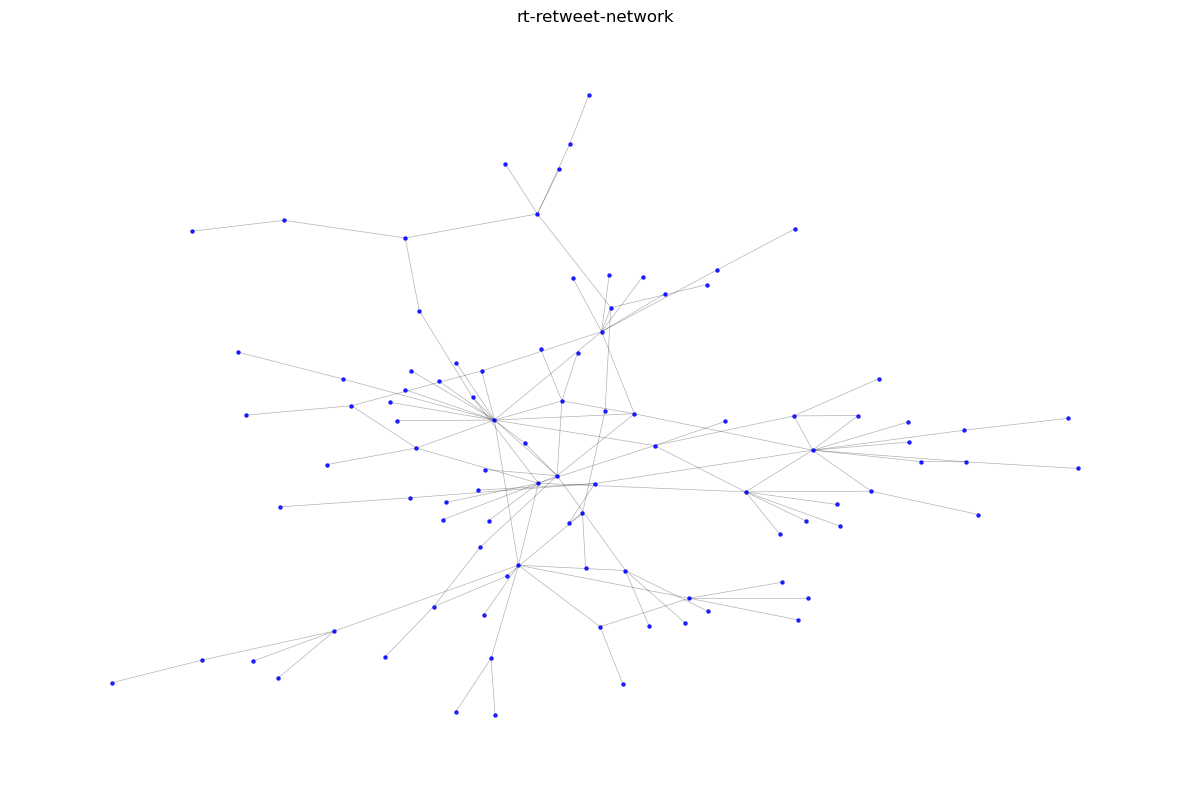

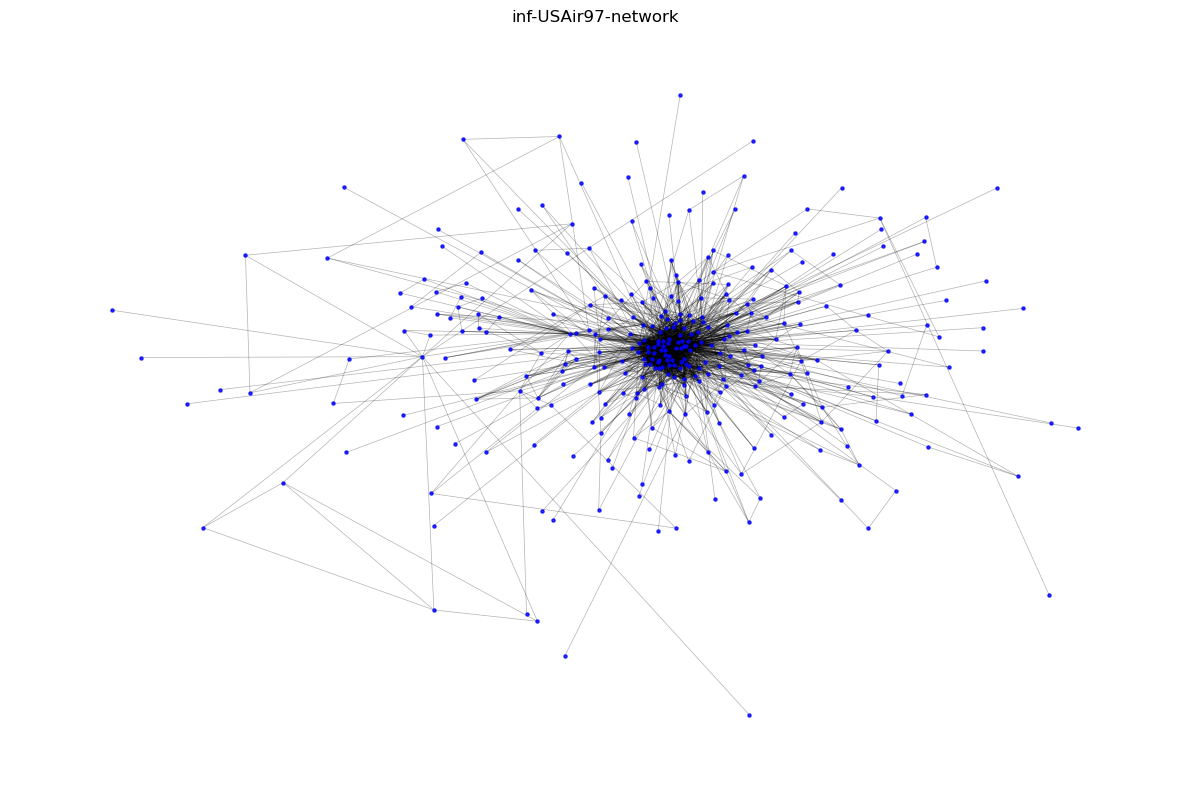

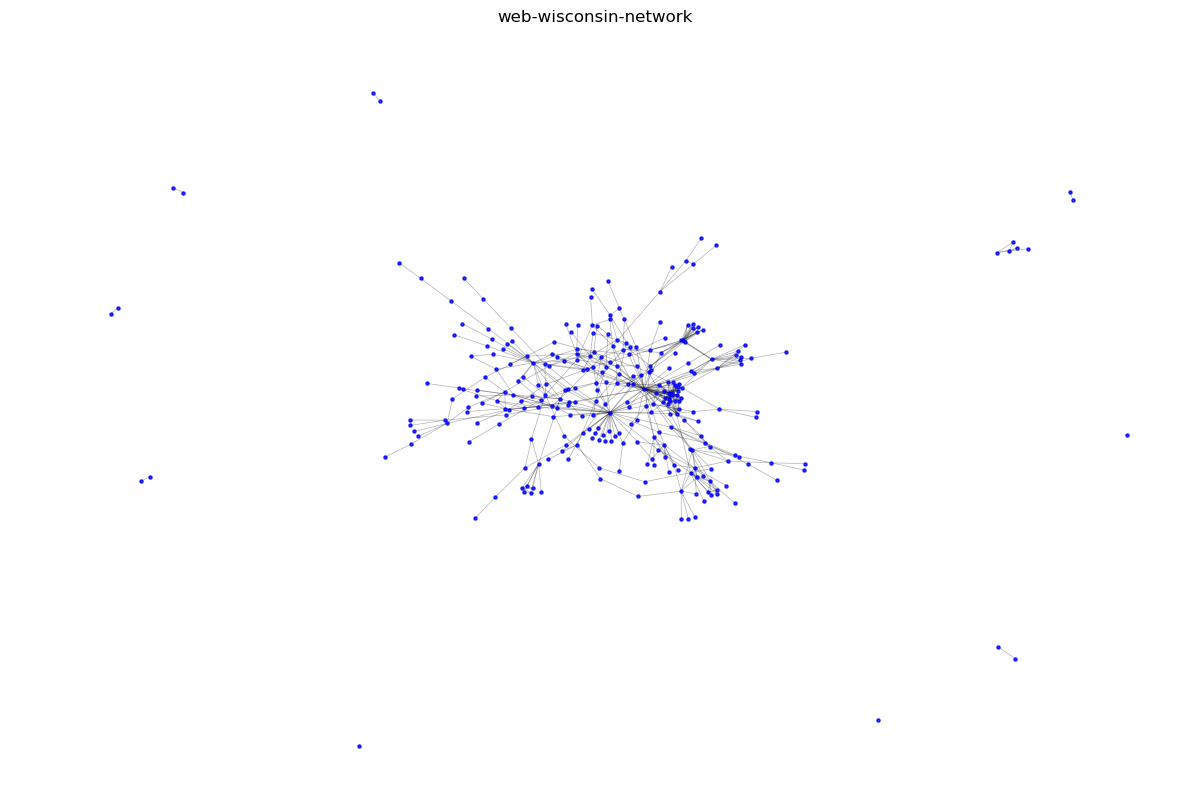

In [19]:
def plot_network(G,name='Original Network'):
    plt.figure(figsize=(12, 8))

    pos = nx.spring_layout(G, seed=42)

    nx.draw_networkx_nodes(G, pos, node_color='blue',node_size=5, alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
    

    plt.title(name)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'community_images/{name}.png')

plot_network(G_fb_food, 'fb-pages-food-network')
plot_network(G_bio_celegans, 'bio-celegans-network')
plot_network(G_bio_CE_GT, 'bio-CE-GT-network')
plot_network(G_rt_retweet, 'rt-retweet-network')
plot_network(G_USAir, 'inf-USAir97-network')
plot_network(G_web_wisconsin, 'web-wisconsin-network')


In [17]:
def find_best_modularity(G):

    communities_generator = community.girvan_newman(G)

    best_mod = -1
    best_comm = None

    for comms in communities_generator:
        mod = community.modularity(G, comms)
        if mod > best_mod:
            best_mod = mod
            best_comm = comms

    return best_comm, best_mod

fb_food_comms, fb_food_mod = find_best_modularity(G_fb_food)
bio_celegans_comms, bio_celegans_mod = find_best_modularity(G_bio_celegans)
bio_CE_GT_comms, bio_CE_GT_mod = find_best_modularity(G_bio_CE_GT)
rt_retweet_comms, rt_retweet_mod = find_best_modularity(G_rt_retweet)
USAir_comms, USAir_mod = find_best_modularity(G_USAir)
web_wisconsin_comms, web_wisconsin_mod = find_best_modularity(G_web_wisconsin)

print(f"fb-pages-food-network modularity: {fb_food_mod}")
print(f"bio-celegans-network modularity: {bio_celegans_mod}")
print(f"bio-CE-GT-network modularity: {bio_CE_GT_mod}")
print(f"rt-retweet-network modularity: {rt_retweet_mod}")
print(f"inf-USAir97-network modularity: {USAir_mod}")
print(f"web-wisconsin-network modularity: {web_wisconsin_mod}")


fb-pages-food-network modularity: 0.629046943689118
bio-celegans-network modularity: 0.4011001981405274
bio-CE-GT-network modularity: 0.587443181715281
rt-retweet-network modularity: 0.6712689020381328
inf-USAir97-network modularity: 0.050874137924273845
web-wisconsin-network modularity: 0.6988597384290077


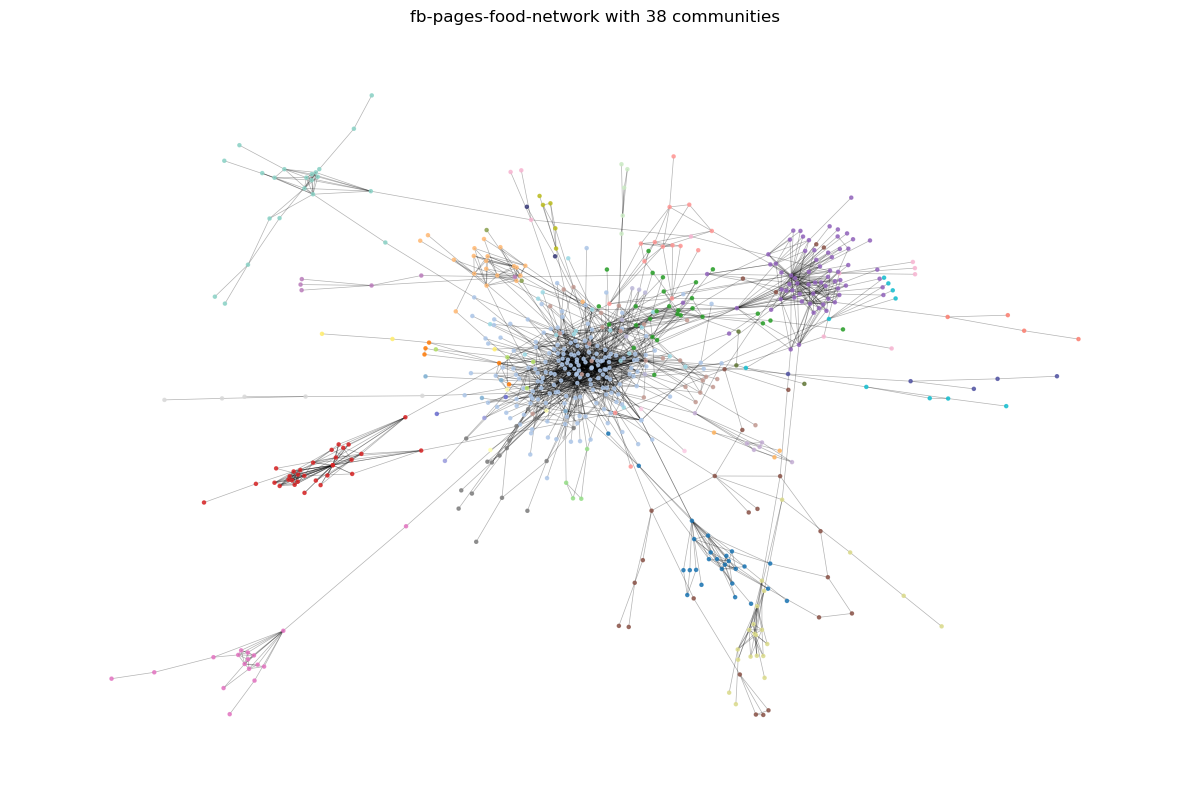

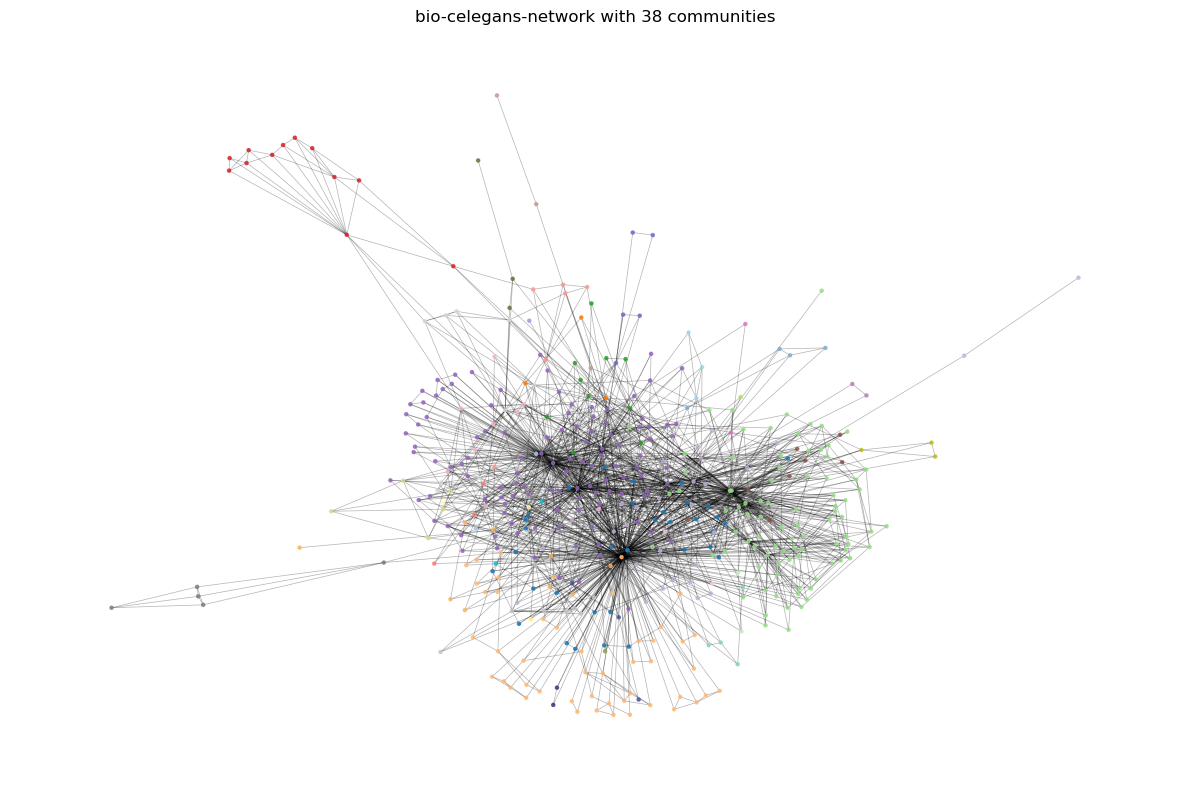

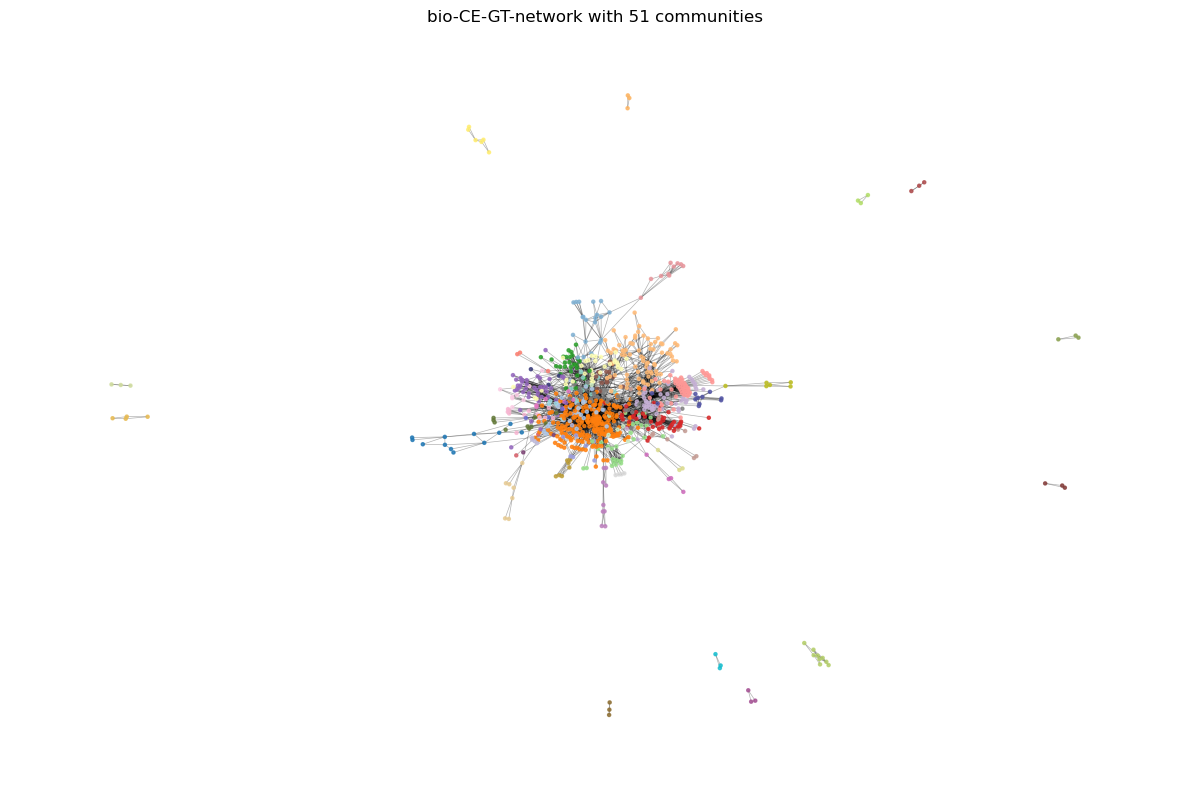

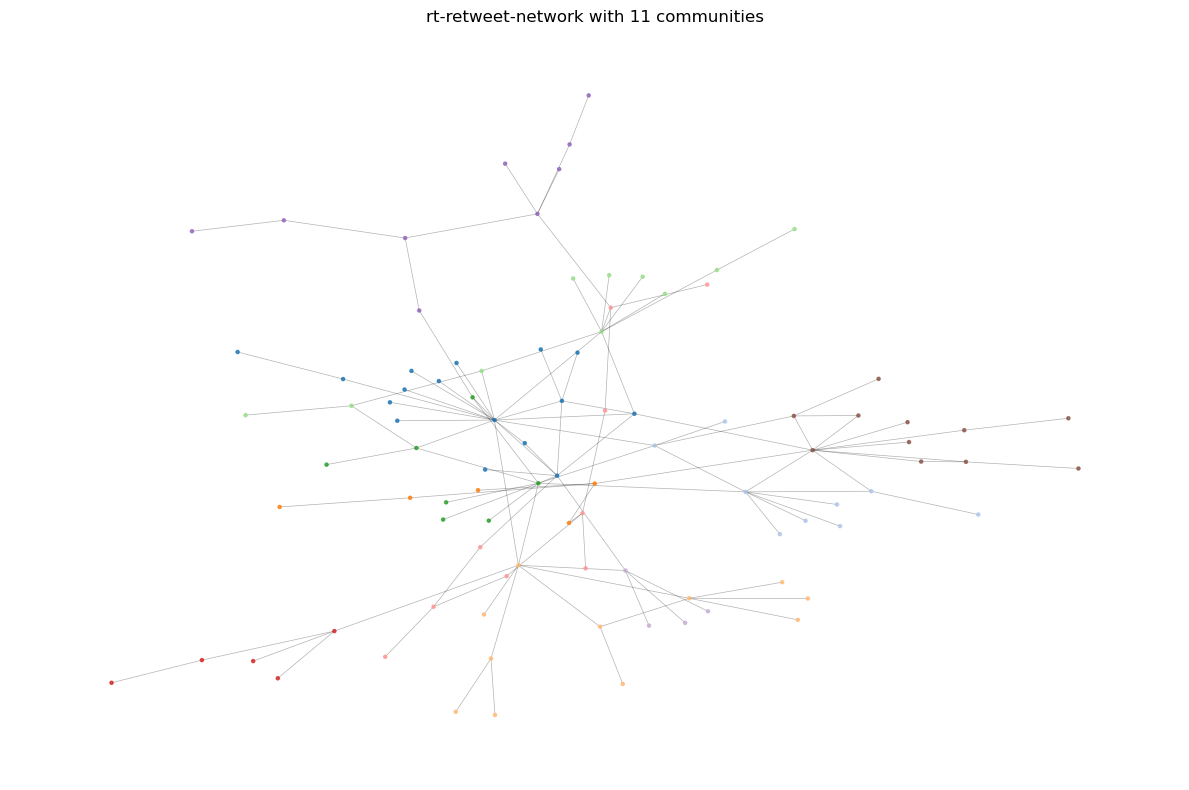

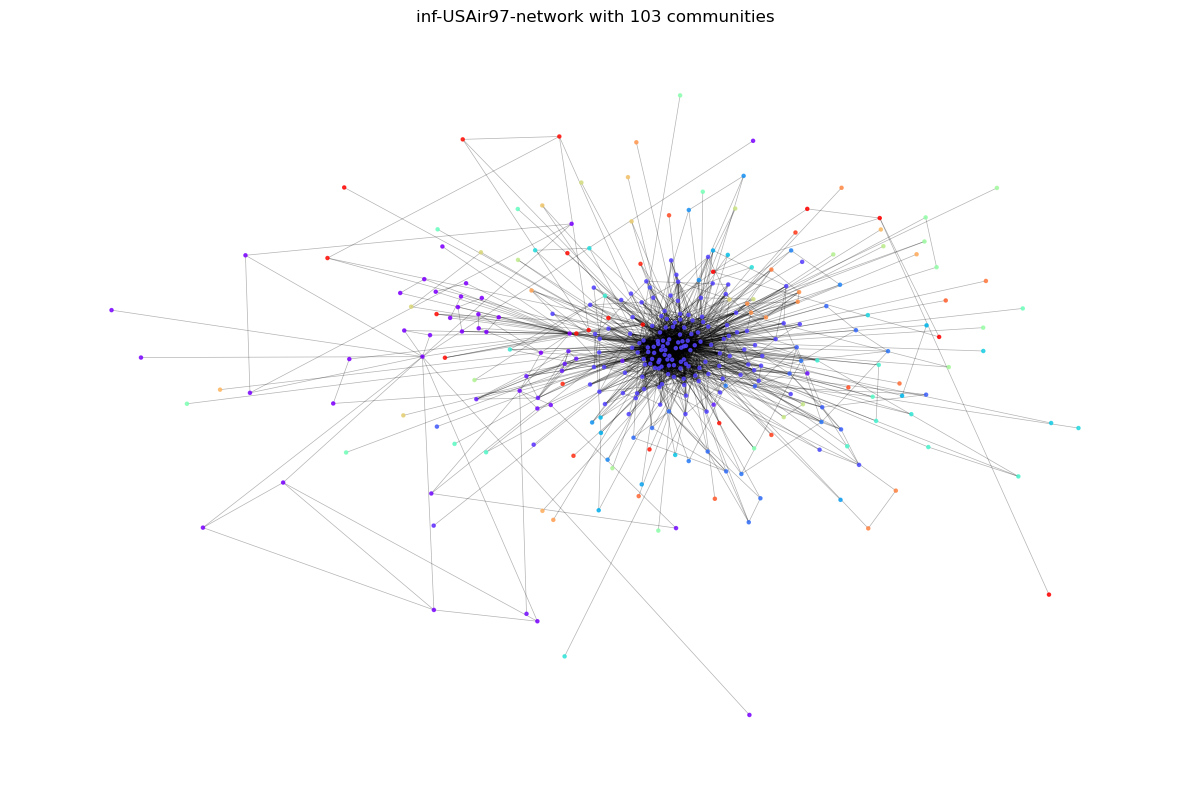

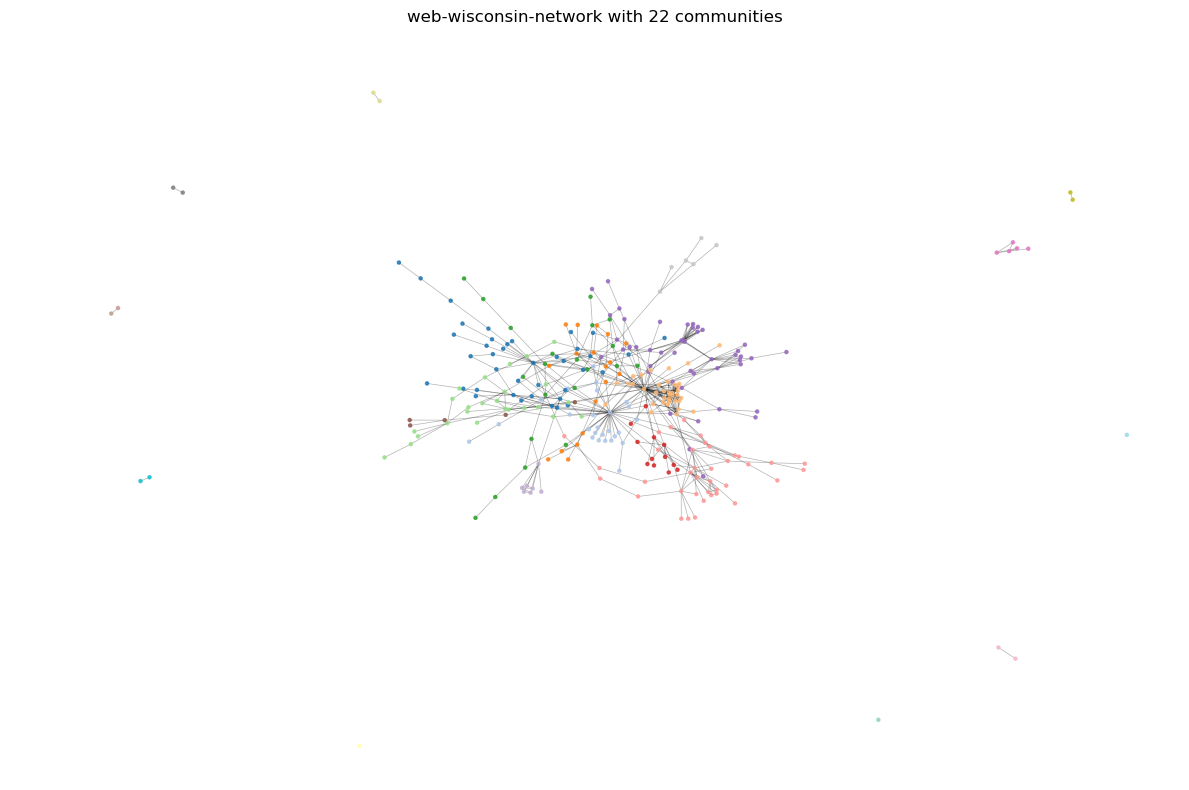

In [24]:
def get_distinct_colors(n_colors):
    # Options for better colormaps
    cmaps = ['tab20', 'Set3', 'tab20b', 'tab20c', 'Paired', 'Accent']
    
    colors = []
    for cmap_name in cmaps:
        cmap = plt.get_cmap(cmap_name)
        colors.extend([cmap(i) for i in range(cmap.N)])
        if len(colors) >= n_colors:
            break
    
    return colors[:n_colors]



def plot_communities(G,comms, name='network'):

    comms_list = list(comms)
    node_colors = {}
    
    if len(comms_list) < 100:
        colors = get_distinct_colors(len(comms_list))
    else:
        colors = cm.rainbow(np.linspace(0, 1, len(comms_list)))

    

    for i, comm in enumerate(comms_list):
        for node in comm:
            node_colors[node] = colors[i]


    color_list = [node_colors[node] for node in G.nodes()]

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(12, 8))

    nx.draw_networkx_nodes(G, pos, node_color=color_list,node_size=5, alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
    plt.title(f"{name} with {len(comms)} communities")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'community_images/{name}-communities.png')


plot_communities(G_fb_food, fb_food_comms,'fb-pages-food-network' )
plot_communities(G_bio_celegans, bio_celegans_comms,'bio-celegans-network' )
plot_communities(G_bio_CE_GT, bio_CE_GT_comms,'bio-CE-GT-network' )
plot_communities(G_rt_retweet, rt_retweet_comms,'rt-retweet-network' )
plot_communities(G_USAir, USAir_comms,'inf-USAir97-network' )
plot_communities(G_web_wisconsin, web_wisconsin_comms,'web-wisconsin-network' )


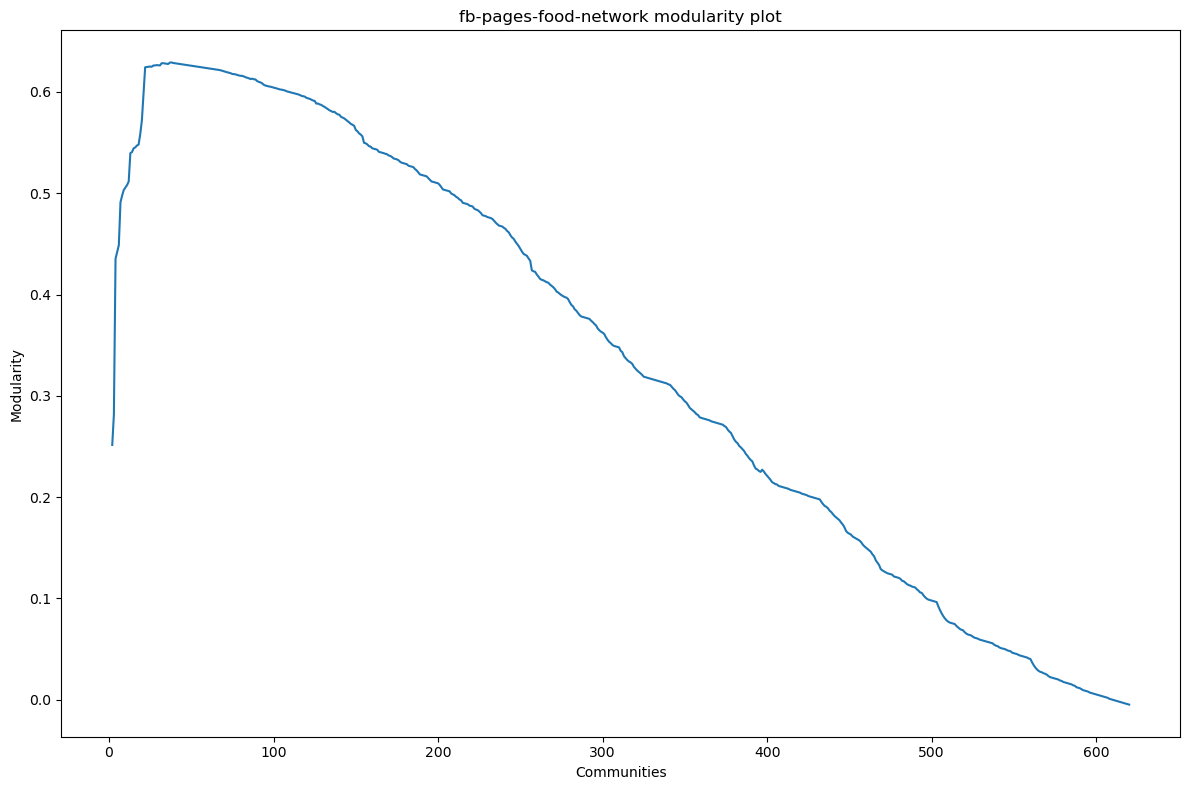

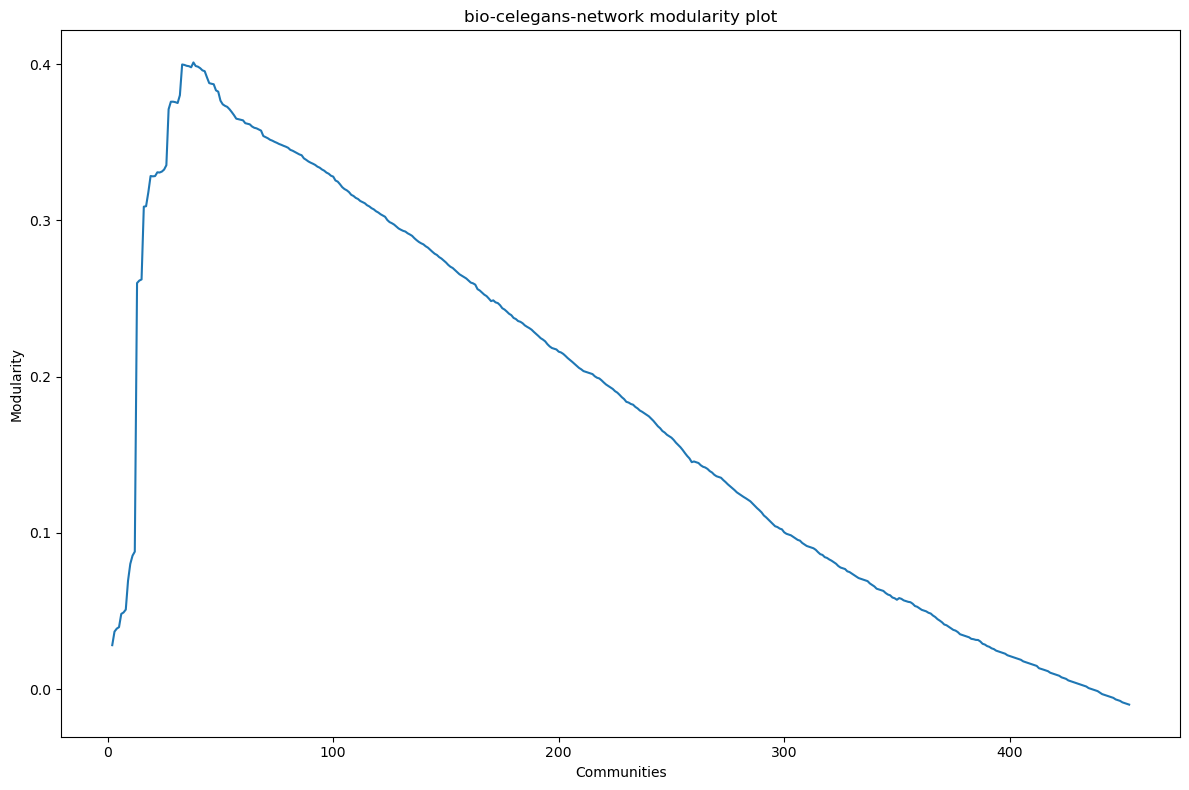

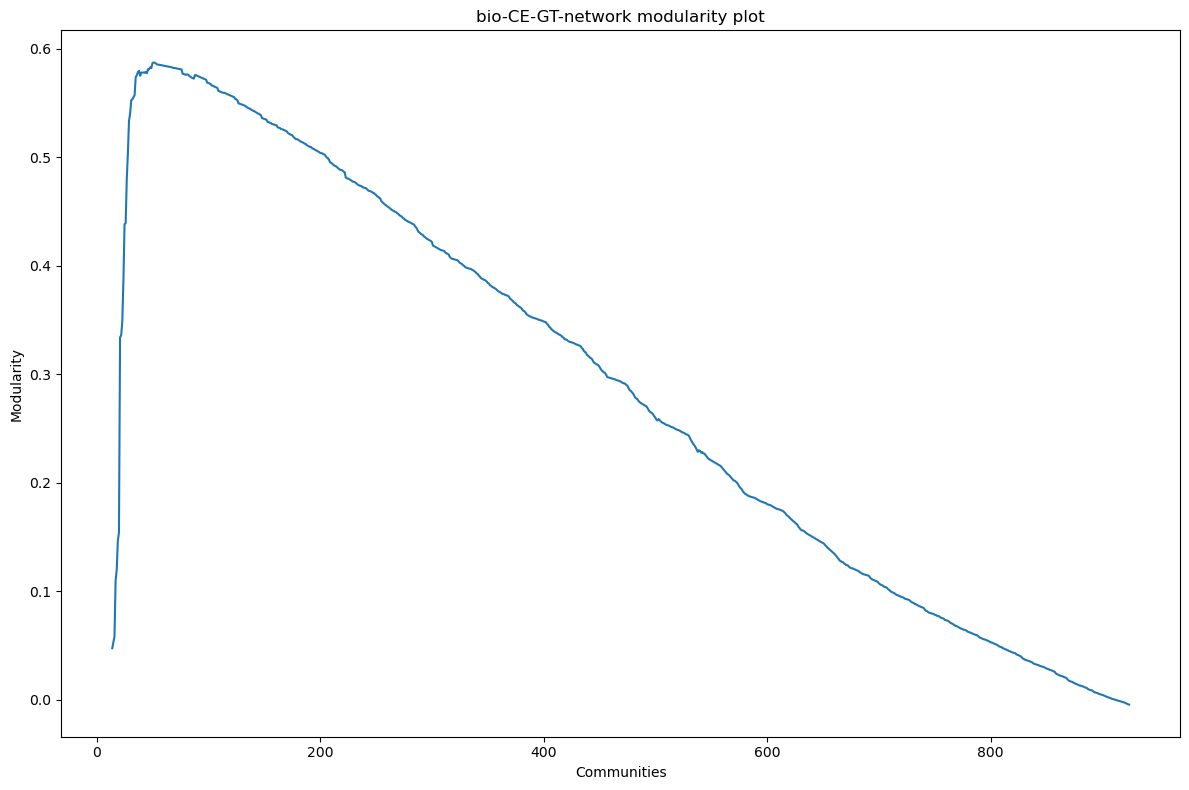

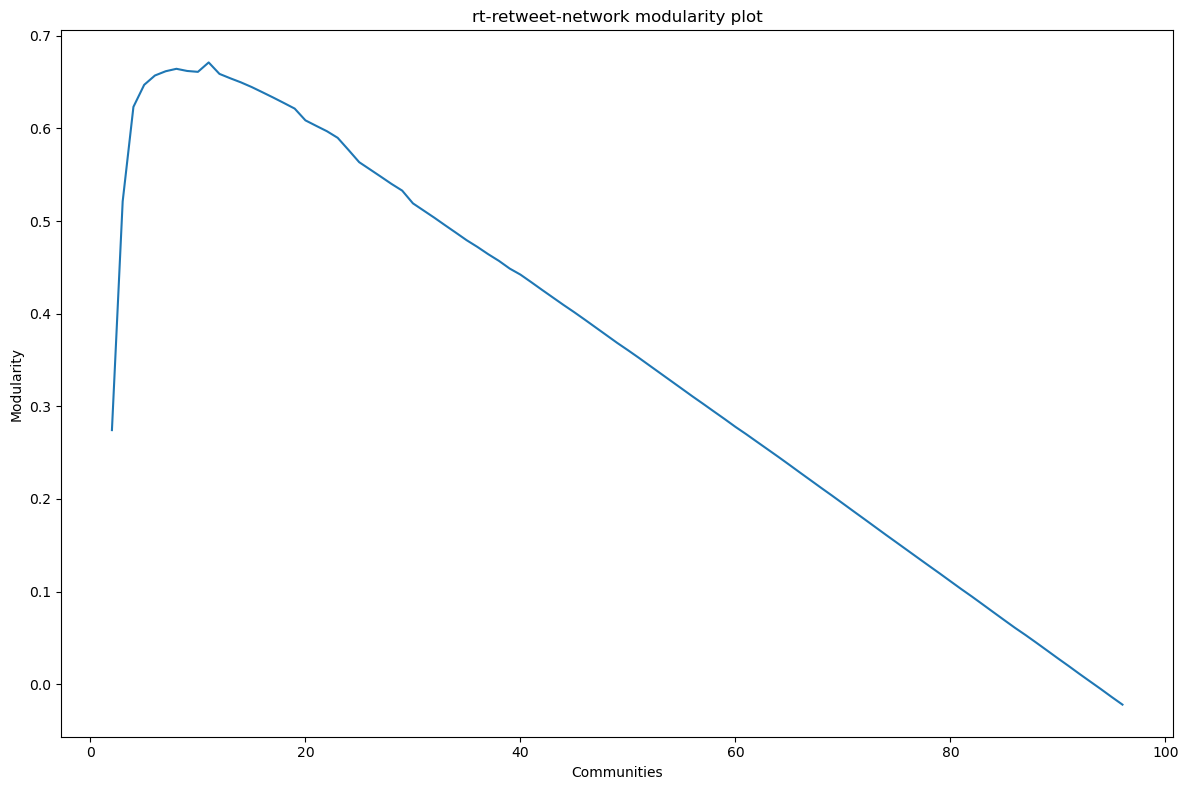

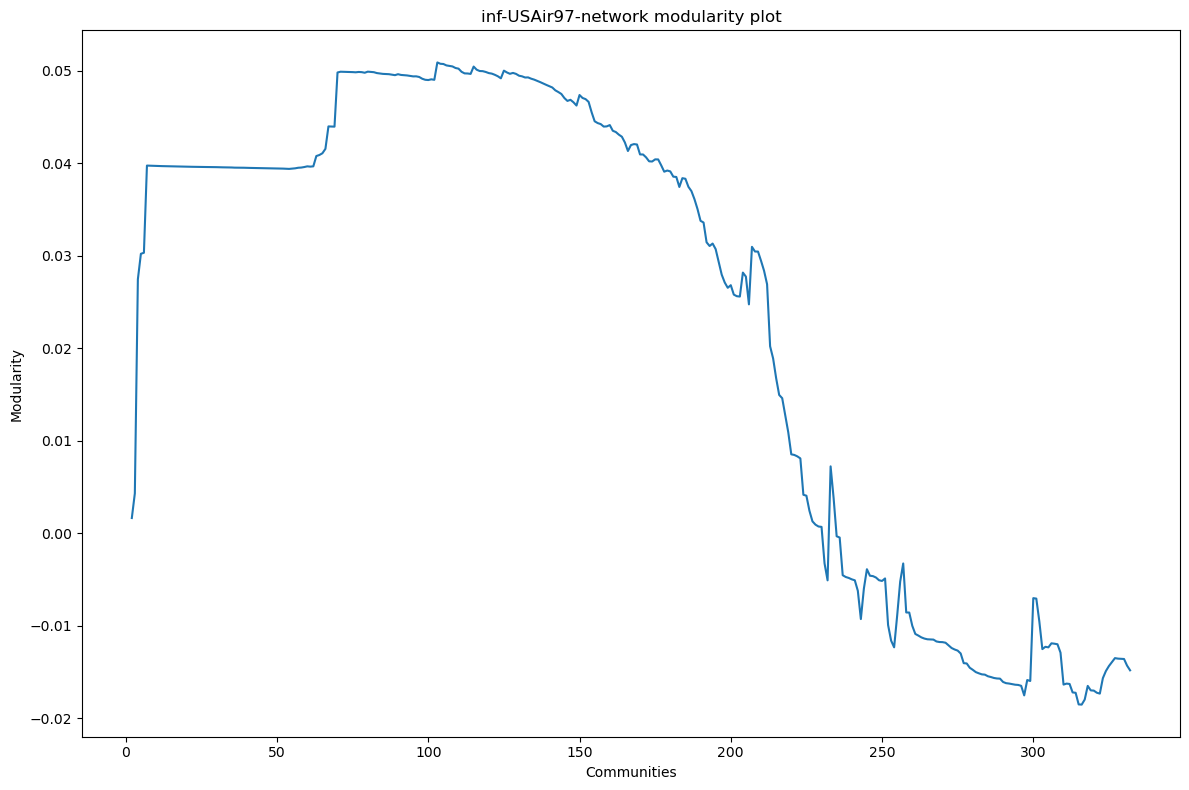

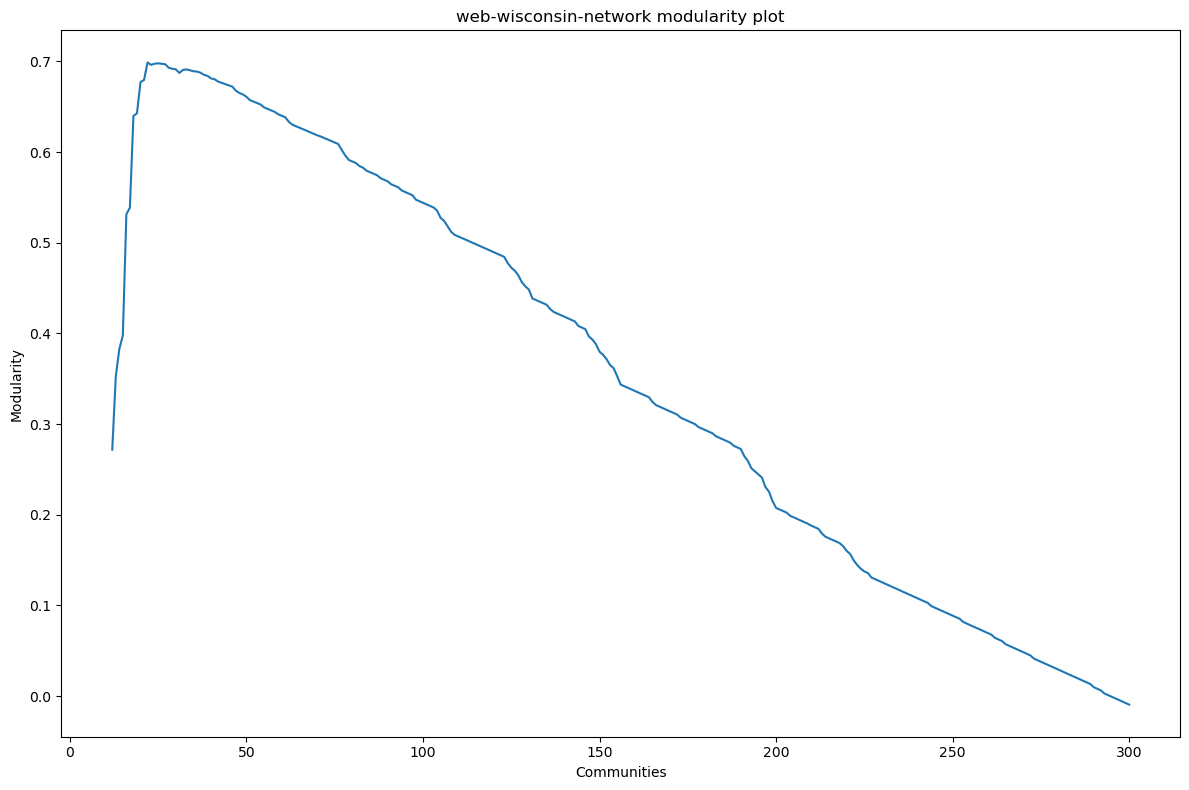

In [25]:
def plot_modularity(G, name='network'):
    communities_generator = community.girvan_newman(G)

    mod_list = []
    comms_list = []

    for comms in communities_generator:
        mod = community.modularity(G, comms)
        mod_list.append(mod)
        comms_list.append(len(comms))

    plt.figure(figsize=(12, 8))
    plt.plot(comms_list, mod_list)
    plt.xlabel("Communities")
    plt.ylabel("Modularity")
    plt.title(f'{name} modularity plot')
    plt.tight_layout()
    plt.savefig(f'community_images/{name}-modularity.png')

plot_modularity(G_fb_food,'fb-pages-food-network')
plot_modularity(G_bio_celegans, 'bio-celegans-network')
plot_modularity(G_bio_CE_GT, 'bio-CE-GT-network')
plot_modularity(G_rt_retweet, 'rt-retweet-network')
plot_modularity(G_USAir, 'inf-USAir97-network')
plot_modularity(G_web_wisconsin, 'web-wisconsin-network')